## 📚 Kütüphaneleri İçe Aktarma

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import joblib
import warnings
warnings.filterwarnings('ignore')

# Görselleştirme ayarları
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('✅ Kütüphaneler yüklendi')

✅ Kütüphaneler yüklendi


## 📂 Train-Test Verilerini Yükleme

In [18]:
# Train verilerini yükle
X_train = pd.read_csv('../data/processed/X_train.csv')
y_train = pd.read_csv('../data/processed/y_train.csv').squeeze()  # Series'e çevir

# Test verilerini yükle
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv').squeeze()

print('✅ Veriler yüklendi')
print(f'\n📊 Train Set:')
print(f'   X_train: {X_train.shape[0]:,} satır x {X_train.shape[1]} özellik')
print(f'   y_train: {y_train.shape[0]:,} satır')
print(f'\n📊 Test Set:')
print(f'   X_test: {X_test.shape[0]:,} satır x {X_test.shape[1]} özellik')
print(f'   y_test: {y_test.shape[0]:,} satır')

✅ Veriler yüklendi

📊 Train Set:
   X_train: 35,596 satır x 34 özellik
   y_train: 35,596 satır

📊 Test Set:
   X_test: 8,899 satır x 34 özellik
   y_test: 8,899 satır


In [19]:
# Feature isimlerini kontrol et
print('📋 Kullanılan Özellikler (Features):\n')
for i, col in enumerate(X_train.columns, 1):
    print(f'{i:2}. {col}')

📋 Kullanılan Özellikler (Features):

 1. price_unit_gbp
 2. supermarket_ASDA
 3. supermarket_Aldi
 4. supermarket_Morrisons
 5. supermarket_Sains
 6. supermarket_Tesco
 7. category_baby_products
 8. category_bakery
 9. category_drinks
10. category_food_cupboard
11. category_free-from
12. category_fresh_food
13. category_frozen
14. category_health_products
15. category_home
16. category_household
17. category_pets
18. unit_encoded
19. price_category_encoded
20. is_own_brand
21. month
22. day
23. day_of_week
24. week
25. is_weekend
26. price_to_unit_ratio
27. price_vs_category_avg
28. price_vs_supermarket_avg
29. is_month_start
30. is_month_end
31. season_encoded
32. is_premium_category
33. is_discount_supermarket
34. premium_category_x_premium_supermarket


---
## 🤖 PART 1: Model Eğitimi

### 1.1 Linear Regression Modelini Oluşturma

In [4]:
# Linear Regression modelini oluştur
model = LinearRegression()

print('✅ Linear Regression modeli oluşturuldu')
print(f'\n📊 Model Parametreleri:')
print(f'   Algorithm: Ordinary Least Squares (OLS)')
print(f'   Fit Intercept: {model.fit_intercept}')

✅ Linear Regression modeli oluşturuldu

📊 Model Parametreleri:
   Algorithm: Ordinary Least Squares (OLS)
   Fit Intercept: True


### 1.2 Model Eğitimi

In [5]:
# Modeli train verileri ile eğit
print('🎓 Model eğitiliyor...')
model.fit(X_train, y_train)
print('✅ Model eğitimi tamamlandı!')

# Model katsayılarını incele
print(f'\n📊 Model Katsayıları:')
print(f'   Intercept (β₀): {model.intercept_:.4f}')
print(f'   Coefficients: {len(model.coef_)} adet')

🎓 Model eğitiliyor...
✅ Model eğitimi tamamlandı!

📊 Model Katsayıları:
   Intercept (β₀): -0.0398
   Coefficients: 34 adet


### 1.3 En Etkili Özellikleri Belirleme

In [6]:
# Katsayıları DataFrame'e çevir
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

# Mutlak değere göre sırala
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print('📊 En Etkili 10 Özellik:\n')
print(feature_importance[['Feature', 'Coefficient']].head(10).to_string(index=False))

📊 En Etkili 10 Özellik:

                               Feature  Coefficient
              price_vs_supermarket_avg     0.983272
                      supermarket_Aldi    -0.239504
                      supermarket_ASDA     0.129555
               is_discount_supermarket    -0.109950
                     supermarket_Sains     0.060321
premium_category_x_premium_supermarket     0.034884
                     supermarket_Tesco     0.025735
                 supermarket_Morrisons     0.023894
                 price_vs_category_avg     0.019738
                category_baby_products     0.014844


💾 Grafik kaydedildi: 23_feature_importance.png


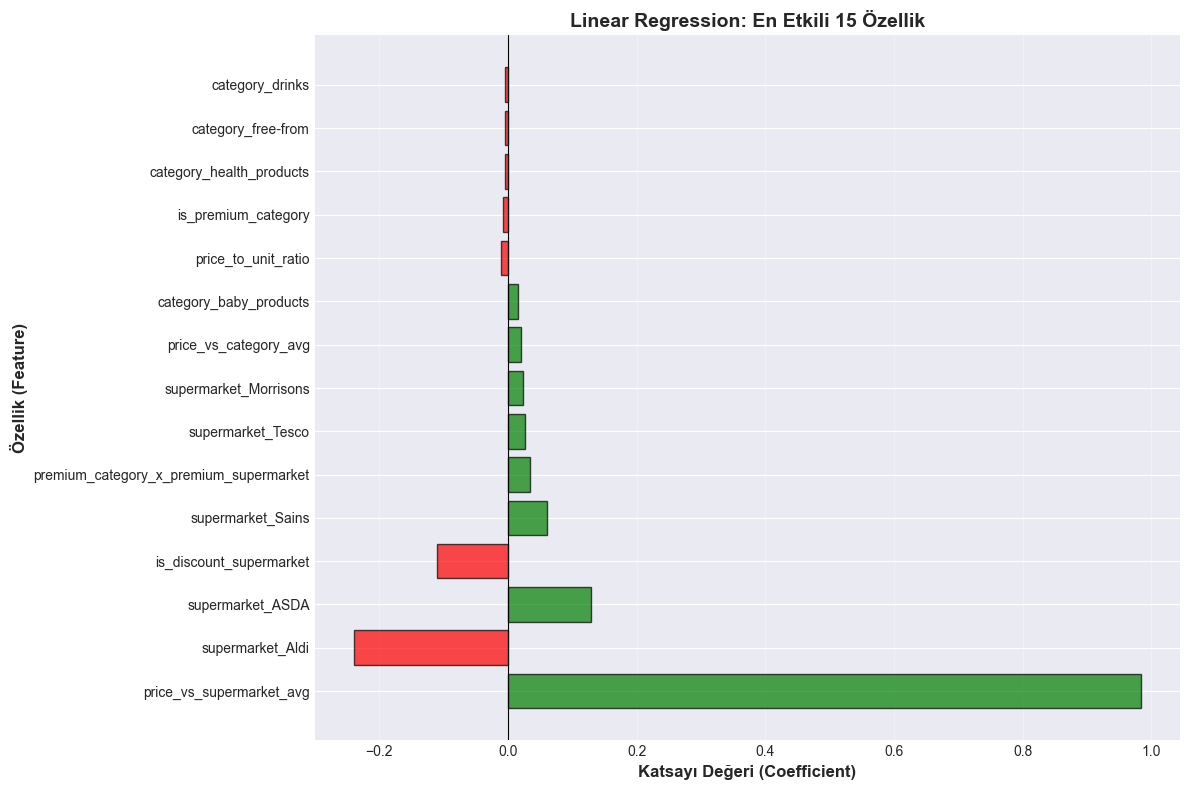

In [7]:
# En etkili 15 özelliği görselleştir
fig, ax = plt.subplots(figsize=(12, 8))

top_features = feature_importance.head(15)
colors = ['green' if x > 0 else 'red' for x in top_features['Coefficient']]

ax.barh(top_features['Feature'], top_features['Coefficient'], color=colors, alpha=0.7, edgecolor='black')
ax.set_xlabel('Katsayı Değeri (Coefficient)', fontweight='bold', fontsize=12)
ax.set_ylabel('Özellik (Feature)', fontweight='bold', fontsize=12)
ax.set_title('Linear Regression: En Etkili 15 Özellik', fontweight='bold', fontsize=14)
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../outputs/figures/23_feature_importance.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 23_feature_importance.png')
plt.show()

---
## 📊 PART 2: Model Performansı (Train Set)

In [8]:
# Train seti üzerinde tahmin yap
y_train_pred = model.predict(X_train)

# Metrikleri hesapla
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

print('📊 TRAIN SET PERFORMANSI')
print('='*50)
print(f'MAE (Mean Absolute Error):     {train_mae:.4f}')
print(f'RMSE (Root Mean Squared Error): {train_rmse:.4f}')
print(f'R² Score:                       {train_r2:.4f} ({train_r2*100:.2f}%)')
print('='*50)

📊 TRAIN SET PERFORMANSI
MAE (Mean Absolute Error):     0.0158
RMSE (Root Mean Squared Error): 0.0353
R² Score:                       0.9987 (99.87%)


---
## 🎯 PART 3: Model Performansı (Test Set)

In [9]:
# Test seti üzerinde tahmin yap
y_test_pred = model.predict(X_test)

# Metrikleri hesapla
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print('📊 TEST SET PERFORMANSI')
print('='*50)
print(f'MAE (Mean Absolute Error):     {test_mae:.4f}')
print(f'RMSE (Root Mean Squared Error): {test_rmse:.4f}')
print(f'R² Score:                       {test_r2:.4f} ({test_r2*100:.2f}%)')
print('='*50)

📊 TEST SET PERFORMANSI
MAE (Mean Absolute Error):     0.0162
RMSE (Root Mean Squared Error): 0.0375
R² Score:                       0.9986 (99.86%)


### 3.1 Gerçek vs Tahmin Grafiği

💾 Grafik kaydedildi: 24_actual_vs_predicted.png


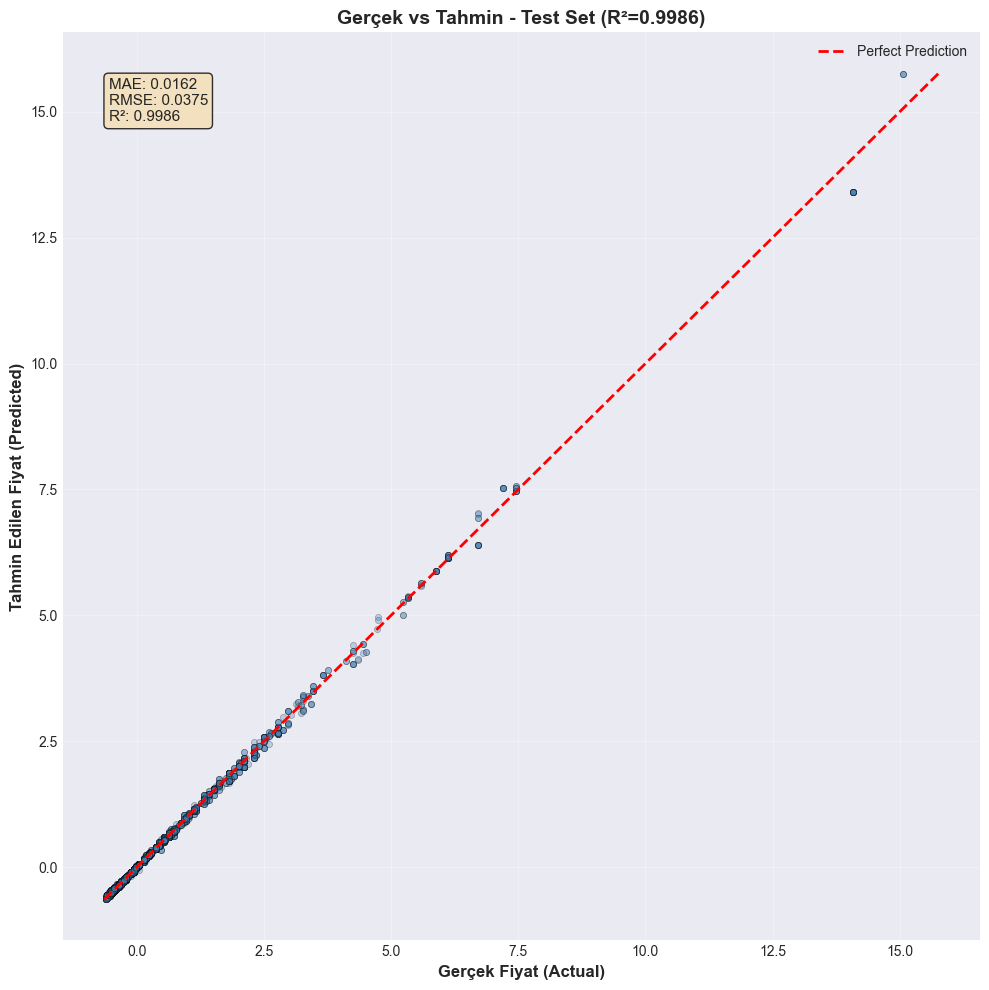

In [10]:
# Gerçek vs Tahmin scatter plot
fig, ax = plt.subplots(figsize=(10, 10))

# Scatter plot
ax.scatter(y_test, y_test_pred, alpha=0.3, s=20, color='steelblue', edgecolors='black', linewidth=0.5)

# Perfect prediction line (y=x)
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

# Etiketler ve başlık
ax.set_xlabel('Gerçek Fiyat (Actual)', fontweight='bold', fontsize=12)
ax.set_ylabel('Tahmin Edilen Fiyat (Predicted)', fontweight='bold', fontsize=12)
ax.set_title(f'Gerçek vs Tahmin - Test Set (R²={test_r2:.4f})', fontweight='bold', fontsize=14)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Metrikleri grafik üzerine ekle
textstr = f'MAE: {test_mae:.4f}\nRMSE: {test_rmse:.4f}\nR²: {test_r2:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.savefig('../outputs/figures/24_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 24_actual_vs_predicted.png')
plt.show()

### 3.2 Residual Plot (Hata Analizi)

💾 Grafik kaydedildi: 25_residual_analysis.png


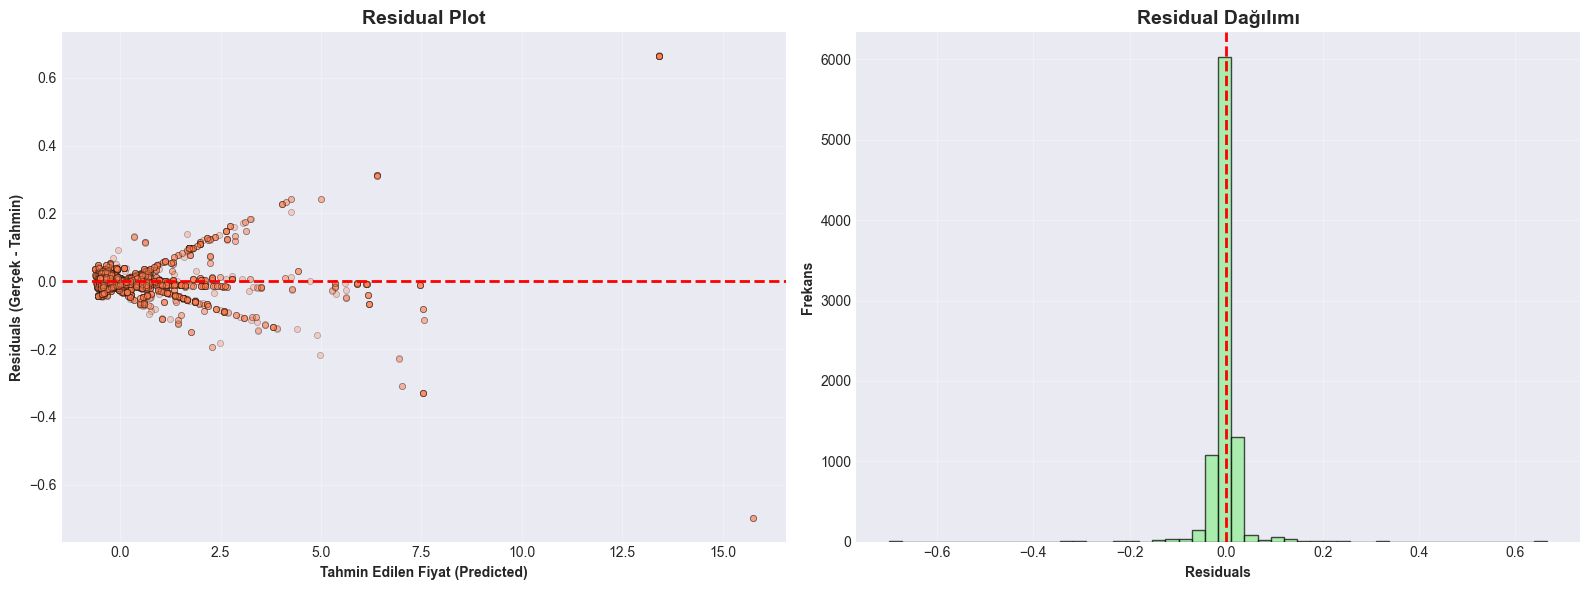

In [11]:
# Residuals (Hatalar) hesapla
residuals = y_test - y_test_pred

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Residual vs Predicted
axes[0].scatter(y_test_pred, residuals, alpha=0.3, s=20, color='coral', edgecolors='black', linewidth=0.5)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Tahmin Edilen Fiyat (Predicted)', fontweight='bold')
axes[0].set_ylabel('Residuals (Gerçek - Tahmin)', fontweight='bold')
axes[0].set_title('Residual Plot', fontweight='bold', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Residual Histogram
axes[1].hist(residuals, bins=50, color='lightgreen', alpha=0.7, edgecolor='black')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Residuals', fontweight='bold')
axes[1].set_ylabel('Frekans', fontweight='bold')
axes[1].set_title('Residual Dağılımı', fontweight='bold', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/figures/25_residual_analysis.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 25_residual_analysis.png')
plt.show()

### 3.3 Performans Karşılaştırması (Train vs Test)

💾 Grafik kaydedildi: 26_train_vs_test_performance.png


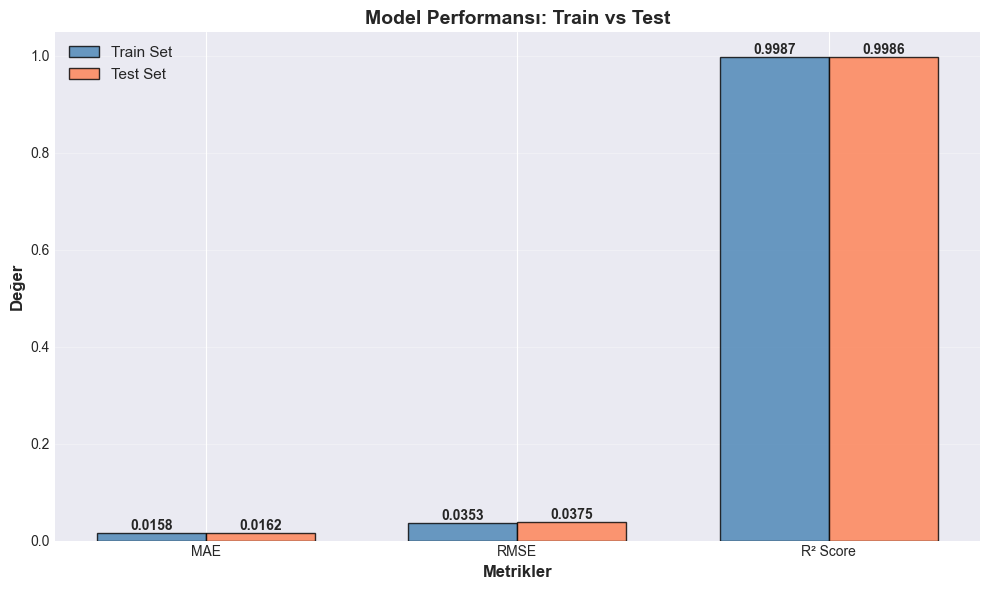

In [12]:
# Train vs Test karşılaştırma grafiği
metrics = ['MAE', 'RMSE', 'R² Score']
train_scores = [train_mae, train_rmse, train_r2]
test_scores = [test_mae, test_rmse, test_r2]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, train_scores, width, label='Train Set', color='steelblue', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, test_scores, width, label='Test Set', color='coral', alpha=0.8, edgecolor='black')

# Değerleri bar üzerine yaz
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

ax.set_xlabel('Metrikler', fontweight='bold', fontsize=12)
ax.set_ylabel('Değer', fontweight='bold', fontsize=12)
ax.set_title('Model Performansı: Train vs Test', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../outputs/figures/26_train_vs_test_performance.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 26_train_vs_test_performance.png')
plt.show()

---
## 💾 PART 4: Model Kaydetme (Web Arayüzü İçin)

### 4.1 Modeli Kaydetme

In [13]:
# Model klasörünü oluştur
import os
os.makedirs('../models', exist_ok=True)

# Modeli kaydet
model_path = '../models/linear_regression_model.pkl'
joblib.dump(model, model_path)
print(f'✅ Model kaydedildi: {model_path}')

✅ Model kaydedildi: ../models/linear_regression_model.pkl


### 4.2 Scaler ve Encoder Bilgilerini Kaydetme

In [14]:
# Feature isimlerini kaydet (arayüzde kullanmak için)
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, '../models/feature_names.pkl')
print(f'✅ Feature isimleri kaydedildi: {len(feature_names)} özellik')

✅ Feature isimleri kaydedildi: 34 özellik


### 4.3 Orijinal Veriyi Kaydetme (Arayüz için ürün listesi)

In [15]:
# Cleaned data'yı yükle (ürün isimleri ve kategoriler için)
df_original = pd.read_csv('../data/processed/cleaned_data.csv')

# Benzersiz ürünleri kaydet
unique_products = df_original[['product_name', 'supermarket_name', 'category_name']].drop_duplicates()
unique_products.to_csv('../data/processed/unique_products.csv', index=False)

print(f'✅ Benzersiz ürünler kaydedildi: {len(unique_products):,} ürün')
print(f'\n📊 Örnek ürünler:')
print(unique_products.head(10))

✅ Benzersiz ürünler kaydedildi: 3,784 ürün

📊 Örnek ürünler:
                                 product_name supermarket_name category_name
0                        19 Crimes Chardonnay        Morrisons        drinks
5                        19 Crimes Chardonnay             ASDA        drinks
39                    19 Crimes Red Wine 1.5L            Tesco        drinks
40                    19 Crimes Red Wine 1.5L            Sains        drinks
89                  19 Crimes Sparkling White        Morrisons        drinks
90                  19 Crimes Sparkling White             ASDA        drinks
121           19 Crimes The Uprising Red Wine        Morrisons        drinks
123           19 Crimes The Uprising Red Wine             ASDA        drinks
152  Aber Falls Single Malt Welsh Whisky 70cl            Sains        drinks
159  Aber Falls Single Malt Welsh Whisky 70cl            Tesco        drinks


---
## 📊 PART 5: Model Özet Raporu

In [16]:
print('='*70)
print('📊 LINEAR REGRESSION MODEL - ÖZET RAPOR')
print('='*70)

print('\n1️⃣ MODEL BİLGİLERİ:')
print(f'   • Algorithm: Linear Regression (OLS)')
print(f'   • Features: {len(X_train.columns)}')
print(f'   • Intercept: {model.intercept_:.4f}')
print(f'   • Train Samples: {X_train.shape[0]:,}')
print(f'   • Test Samples: {X_test.shape[0]:,}')

print('\n2️⃣ TRAIN SET PERFORMANSI:')
print(f'   • MAE:  {train_mae:.4f}')
print(f'   • RMSE: {train_rmse:.4f}')
print(f'   • R²:   {train_r2:.4f} ({train_r2*100:.2f}%)')

print('\n3️⃣ TEST SET PERFORMANSI:')
print(f'   • MAE:  {test_mae:.4f}')
print(f'   • RMSE: {test_rmse:.4f}')
print(f'   • R²:   {test_r2:.4f} ({test_r2*100:.2f}%)')

print('\n4️⃣ EN ETKİLİ ÖZELLİKLER (Top 5):')
for idx, row in feature_importance.head(5).iterrows():
    print(f'   • {row["Feature"]}: {row["Coefficient"]:.4f}')

print('\n5️⃣ KAYDEDILEN DOSYALAR:')
print(f'   ✅ linear_regression_model.pkl')
print(f'   ✅ feature_names.pkl')
print(f'   ✅ unique_products.csv ({len(unique_products):,} ürün)')
print(f'   ✅ 4 görselleştirme (PNG)')

print('\n' + '='*70)
print('✅ LINEAR REGRESSION MODELİ TAMAMLANDI!')
print('🎯 Sıradaki Adım: Web Arayüzü (Streamlit/Gradio)')
print('='*70)

📊 LINEAR REGRESSION MODEL - ÖZET RAPOR

1️⃣ MODEL BİLGİLERİ:
   • Algorithm: Linear Regression (OLS)
   • Features: 34
   • Intercept: -0.0398
   • Train Samples: 35,596
   • Test Samples: 8,899

2️⃣ TRAIN SET PERFORMANSI:
   • MAE:  0.0158
   • RMSE: 0.0353
   • R²:   0.9987 (99.87%)

3️⃣ TEST SET PERFORMANSI:
   • MAE:  0.0162
   • RMSE: 0.0375
   • R²:   0.9986 (99.86%)

4️⃣ EN ETKİLİ ÖZELLİKLER (Top 5):
   • price_vs_supermarket_avg: 0.9833
   • supermarket_Aldi: -0.2395
   • supermarket_ASDA: 0.1296
   • is_discount_supermarket: -0.1099
   • supermarket_Sains: 0.0603

5️⃣ KAYDEDILEN DOSYALAR:
   ✅ linear_regression_model.pkl
   ✅ feature_names.pkl
   ✅ unique_products.csv (3,784 ürün)
   ✅ 4 görselleştirme (PNG)

✅ LINEAR REGRESSION MODELİ TAMAMLANDI!
🎯 Sıradaki Adım: Web Arayüzü (Streamlit/Gradio)
